In [3]:
import os
base_dir = 'D:/SEMESTER 7/TKC/TUBES/brain-tumor-split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_meningioma_dir = os.path.join(train_dir, 'Meningioma')
train_glioma_dir = os.path.join(train_dir, 'Glioma')
train_pituitary_dir = os.path.join(train_dir, 'Pituitary')

validation_meningioma_dir = os.path.join(validation_dir, 'Meningioma')
validation_glioma_dir = os.path.join(validation_dir, 'Glioma')
validation_pituitary_dir = os.path.join(validation_dir, 'Pituitary')

test_meningioma_dir = os.path.join(test_dir, 'Meningioma')
test_glioma_dir = os.path.join(test_dir, 'Glioma')
test_pituitary_dir = os.path.join(test_dir, 'Pituitary')

In [4]:
print('Data Train : ')
print('Train Meningioma :', len(os.listdir(train_meningioma_dir)))
print('Train Glioma : ', len(os.listdir(train_glioma_dir)))
print('Train Pituitary : ', len(os.listdir(train_pituitary_dir)))
print(""*2)
print('Data Validation : ')
print('Validation Meningioma :', len(os.listdir(validation_meningioma_dir)))
print('Validationn Glioma : ', len(os.listdir(validation_glioma_dir)))
print('Validation Pituitary : ', len(os.listdir(validation_pituitary_dir)))
print(""*2)
print('Data Test : ')
print('Test Meningioma :', len(os.listdir(test_meningioma_dir)))
print('Test Glioma : ', len(os.listdir(test_glioma_dir)))
print('Test Pituitary : ', len(os.listdir(test_pituitary_dir)))

Data Train : 
Train Meningioma : 566
Train Glioma :  1140
Train Pituitary :  744

Data Validation : 
Validation Meningioma : 134
Validationn Glioma :  270
Validation Pituitary :  176

Data Test : 
Test Meningioma : 8
Test Glioma :  16
Test Pituitary :  10


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
height = 150
width = 150
batch_size = 32

In [6]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = "D:/SEMESTER 7/TKC/TUBES/brain-tumor-split/train"
VALIDATION_DIR = "D:/SEMESTER 7/TKC/TUBES/brain-tumor-split/val"
TEST_DIR = "D:/SEMESTER 7/TKC/TUBES/brain-tumor-split/test"

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 2450 images belonging to 3 classes.
Found 580 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [8]:
from keras.applications.vgg19 import VGG19

model1 = VGG19(include_top=False, input_shape=(150,150,3))

In [9]:
model1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
from tensorflow.keras import layers
x = layers.Flatten()(model1.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)                 
x = layers.Dense(3, activation='softmax')(x) 

In [11]:
from tensorflow.keras.models import Model
model2 = Model(model1.input, x)

In [12]:
for layer in model1.layers:
    layer.trainable = False

In [13]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model2.compile(
    optimizer=Adam(lr=0.0001, decay = 0.001/20),
    loss = 'binary_crossentropy',
    metrics = ['accuracy',
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
)

C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
coba = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=150,
    batch_size=5,
)

Epoch 1/25


UnknownError: 2 root error(s) found.
  (0) UNKNOWN:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Relu
 (defined at C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:4867)
]]
	 [[assert_greater_equal/Assert/AssertGuard/pivot_f/_3/_23]]
  (1) UNKNOWN:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Relu
 (defined at C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:4867)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2580]

Errors may have originated from an input operation.
Input Source operations connected to node model/block1_conv1/Relu:
In[0] model/block1_conv1/BiasAdd (defined at C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional.py:264)

Operation defined at: (most recent call last)
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\DKID~1\AppData\Local\Temp/ipykernel_8208/3868906635.py", line 1, in <module>
>>>     coba = model2.fit(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional.py", line 273, in call
>>>     return self.activation(outputs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 311, in relu
>>>     return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 4867, in relu
>>>     x = tf.nn.relu(x)
>>> 

Input Source operations connected to node model/block1_conv1/Relu:
In[0] model/block1_conv1/BiasAdd (defined at C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional.py:264)

Operation defined at: (most recent call last)
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\DKID~1\AppData\Local\Temp/ipykernel_8208/3868906635.py", line 1, in <module>
>>>     coba = model2.fit(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\layers\convolutional.py", line 273, in call
>>>     return self.activation(outputs)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\activations.py", line 311, in relu
>>>     return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
>>> 
>>>   File "C:\Users\DK ID\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 4867, in relu
>>>     x = tf.nn.relu(x)
>>> 

Function call stack:
train_function -> train_function


In [34]:
model2.save('D:/SEMESTER 7/TKC/TUBES/modelcoba6-TKC.h5')

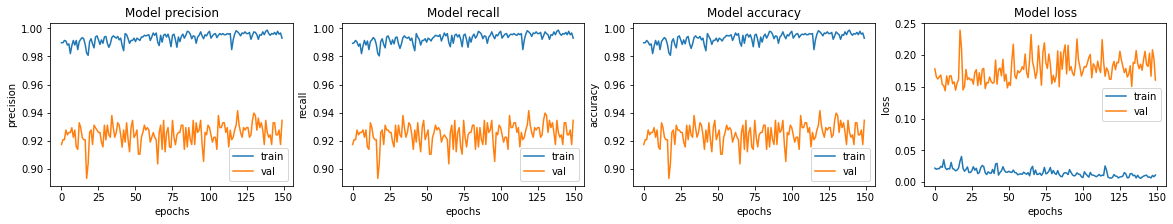

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(coba.history[met])
    ax[i].plot(coba.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

plt.show()

In [36]:
from sklearn.metrics import classification_report
import numpy as np

Y_pred = model2.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=['meningioma', 'glioma', 'pituitary']))

C:\Users\DKID~1\AppData\Local\Temp/ipykernel_2064/434002456.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model2.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

  meningioma       0.94      0.94      0.94        16
      glioma       0.88      0.88      0.88         8
   pituitary       1.00      1.00      1.00        10

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = 'imagenet',
                                pooling = max)
for layer in base_model.layers:
    layer.trainable = False

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import Model
x = layers.Flatten()(base_model.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)                 
x = layers.Dense(3, activation='softmax')(x) 

In [19]:
model3 = Model(base_model.input, x)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model3.compile(
    optimizer=Adam(lr=0.0001, decay = 0.001/20),
    loss = 'binary_crossentropy',
    metrics = ['accuracy',
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
)

In [21]:
coba2 = model3.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=150,
    batch_size=5,
)

Epoch 1/150
77/77 [==============================] - 68s 738ms/step - loss: 0.5948 - accuracy: 0.5441 - precision: 0.5693 - recall: 0.4543 - val_loss: 0.4552 - val_accuracy: 0.7638 - val_precision: 0.8503 - val_recall: 0.6466
Epoch 2/150
77/77 [==============================] - 50s 644ms/step - loss: 0.5143 - accuracy: 0.6159 - precision: 0.6433 - recall: 0.5698 - val_loss: 0.4016 - val_accuracy: 0.7569 - val_precision: 0.8248 - val_recall: 0.6983
Epoch 3/150
77/77 [==============================] - 49s 636ms/step - loss: 0.4449 - accuracy: 0.7029 - precision: 0.7277 - recall: 0.6653 - val_loss: 0.4404 - val_accuracy: 0.7345 - val_precision: 0.7378 - val_recall: 0.7328
Epoch 4/150
77/77 [==============================] - 50s 653ms/step - loss: 0.4393 - accuracy: 0.6963 - precision: 0.7259 - recall: 0.6669 - val_loss: 0.3486 - val_accuracy: 0.7500 - val_precision: 0.7563 - val_recall: 0.7276
Epoch 5/150
77/77 [==============================] - 49s 632ms/step - loss: 0.4048 - accuracy: 0

77/77 [==============================] - 42s 549ms/step - loss: 0.1059 - accuracy: 0.9388 - precision: 0.9403 - recall: 0.9388 - val_loss: 0.1520 - val_accuracy: 0.9069 - val_precision: 0.9097 - val_recall: 0.9034
Epoch 74/150
77/77 [==============================] - 42s 546ms/step - loss: 0.1153 - accuracy: 0.9290 - precision: 0.9308 - recall: 0.9282 - val_loss: 0.1702 - val_accuracy: 0.9034 - val_precision: 0.9066 - val_recall: 0.9034
Epoch 75/150
77/77 [==============================] - 42s 540ms/step - loss: 0.1064 - accuracy: 0.9396 - precision: 0.9402 - recall: 0.9376 - val_loss: 0.1544 - val_accuracy: 0.9276 - val_precision: 0.9289 - val_recall: 0.9241
Epoch 76/150
77/77 [==============================] - 42s 542ms/step - loss: 0.1204 - accuracy: 0.9245 - precision: 0.9259 - recall: 0.9233 - val_loss: 0.1686 - val_accuracy: 0.9034 - val_precision: 0.9048 - val_recall: 0.9017
Epoch 77/150
77/77 [==============================] - 42s 547ms/step - loss: 0.0950 - accuracy: 0.9478 - 

Epoch 145/150
77/77 [==============================] - 45s 580ms/step - loss: 0.0383 - accuracy: 0.9780 - precision: 0.9788 - recall: 0.9780 - val_loss: 0.1650 - val_accuracy: 0.9207 - val_precision: 0.9206 - val_recall: 0.9190
Epoch 146/150
77/77 [==============================] - 48s 626ms/step - loss: 0.0726 - accuracy: 0.9624 - precision: 0.9628 - recall: 0.9616 - val_loss: 0.1731 - val_accuracy: 0.9034 - val_precision: 0.9047 - val_recall: 0.9000
Epoch 147/150
77/77 [==============================] - 48s 619ms/step - loss: 0.0448 - accuracy: 0.9792 - precision: 0.9796 - recall: 0.9780 - val_loss: 0.1472 - val_accuracy: 0.9431 - val_precision: 0.9447 - val_recall: 0.9431
Epoch 148/150
77/77 [==============================] - 46s 600ms/step - loss: 0.0317 - accuracy: 0.9845 - precision: 0.9845 - recall: 0.9841 - val_loss: 0.1447 - val_accuracy: 0.9293 - val_precision: 0.9293 - val_recall: 0.9293
Epoch 149/150
77/77 [==============================] - 46s 601ms/step - loss: 0.0395 - a

In [22]:
model3.save('D:/SEMESTER 7/TKC/TUBES/modelcobaInception2-TKC.h5')

In [23]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

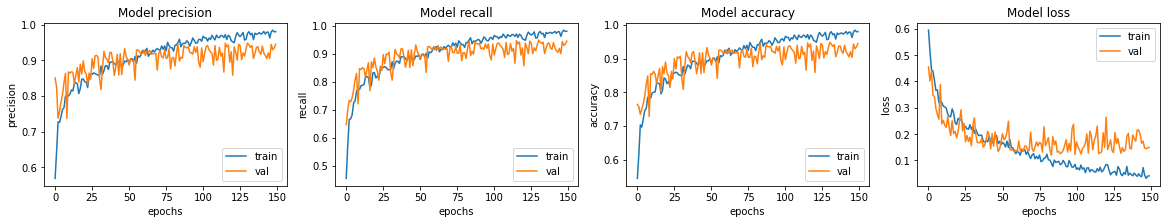

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(coba2.history[met])
    ax[i].plot(coba2.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

plt.show()

In [25]:
from sklearn.metrics import classification_report
import numpy as np

Y_pred = model3.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=['meningioma', 'glioma', 'pituitary']))

C:\Users\DKID~1\AppData\Local\Temp/ipykernel_20268/2809325850.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model3.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

  meningioma       1.00      0.94      0.97        16
      glioma       0.88      0.88      0.88         8
   pituitary       0.91      1.00      0.95        10

    accuracy                           0.94        34
   macro avg       0.93      0.94      0.93        34
weighted avg       0.94      0.94      0.94        34

